<a href="https://colab.research.google.com/github/Alaa-f-Abdalaal/Machine-Projectss/blob/main/Crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alaaabobakr","key":"0400b54afdcce9a74d6070fd3b8779ca"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adedokunjulius/yield-df

Dataset URL: https://www.kaggle.com/datasets/adedokunjulius/yield-df
License(s): apache-2.0
yield-df.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/yield-df.zip -d dataset

Archive:  /content/yield-df.zip
replace dataset/yield_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls dataset

yield_df.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset/yield_df.csv")
df


,ID,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  int64  
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,ID,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df["Area"].value_counts()

,count
Area,
India,4048
Brazil,2277
Mexico,1472
Pakistan,1449
Australia,966
...,...
Latvia,42
Belgium,39
Bahrain,29


In [ ]:
df["Item"].value_counts()

,count
Item,
Potatoes,4276
Maize,4121
Wheat,3857
"Rice, paddy",3388
Soybeans,3223
Sorghum,3039
Sweet potatoes,2890
Cassava,2045
Yams,847


In [ ]:
df.isnull().sum()

,0
ID,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [ ]:
df.drop("ID", axis=1, inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [ ]:
df.duplicated().sum()

np.int64(2310)

In [ ]:
df.drop_duplicates(inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [ ]:
def isStr(obj):
  try:
    float(obj)
    return False
  except:
    return True

In [ ]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index
to_drop

Index([], dtype='int64')

In [ ]:
df=df.drop(to_drop)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


<Axes: xlabel='count', ylabel='Area'>

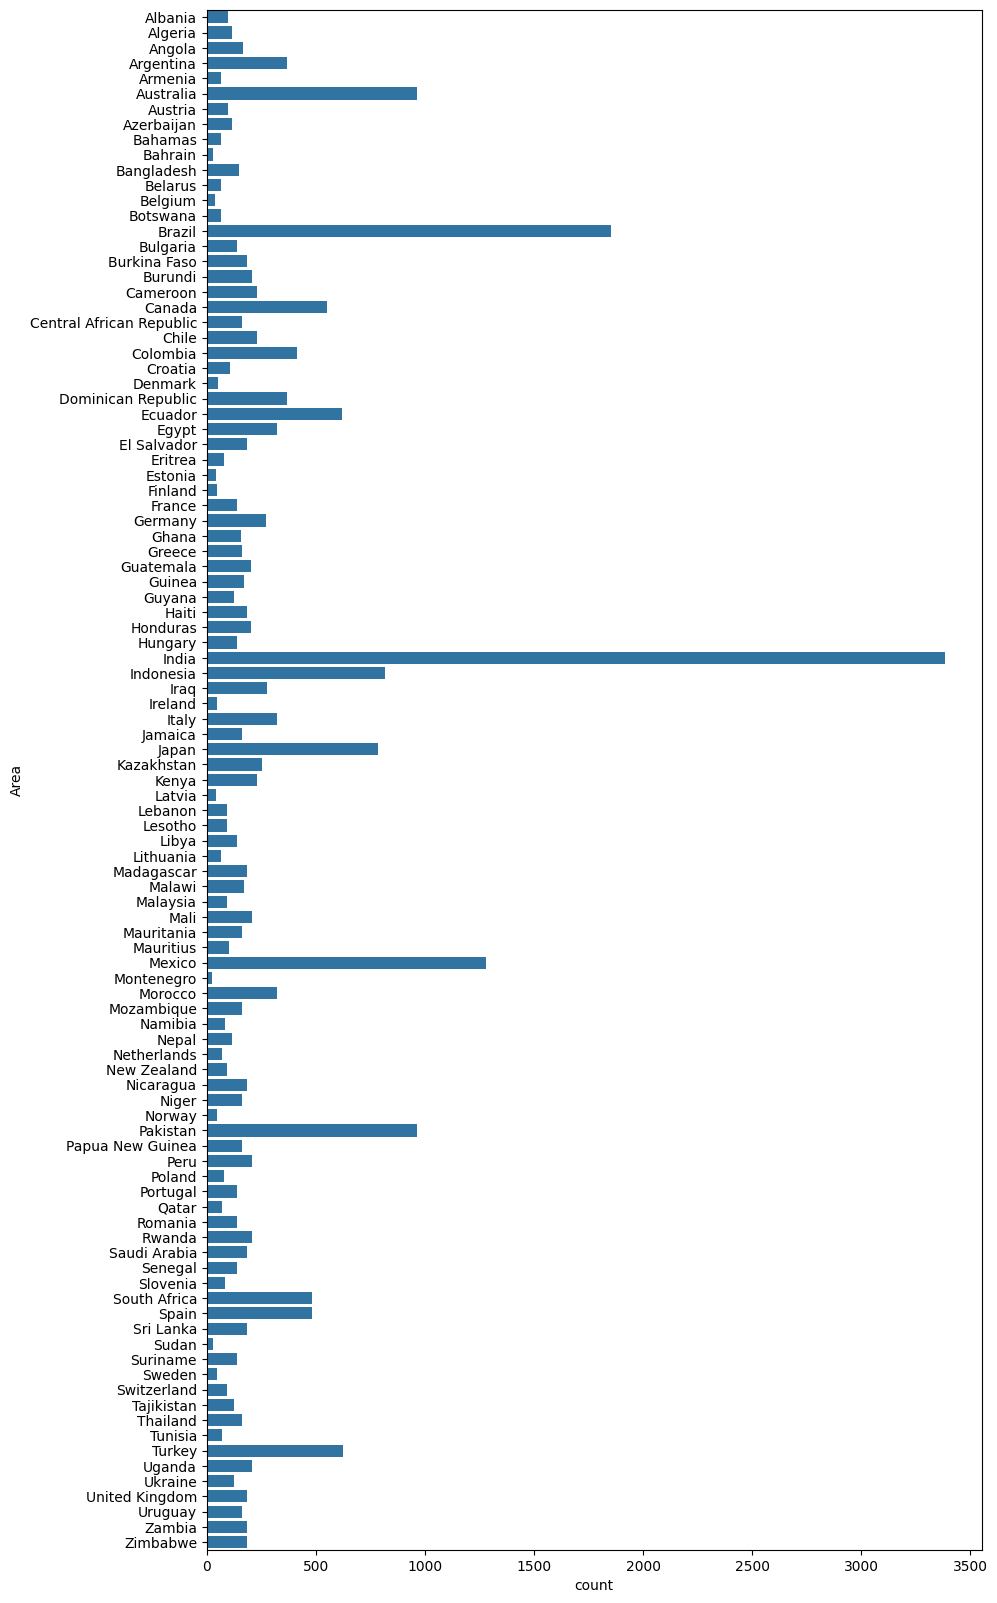

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.countplot(y=df["Area"])

In [ ]:
country=df["Area"].value_counts()
country
# country=df["Area"].unique()
# country

,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966
...,...
Latvia,42
Belgium,39
Bahrain,29


In [ ]:
for state in country.index:
  print(state)

India
Brazil
Mexico
Australia
Pakistan
Indonesia
Japan
Turkey
Ecuador
Canada
South Africa
Spain
Colombia
Argentina
Dominican Republic
Egypt
Morocco
Italy
Iraq
Germany
Kazakhstan
Chile
Cameroon
Kenya
Mali
Rwanda
Uganda
Burundi
Peru
Honduras
Guatemala
El Salvador
Burkina Faso
Haiti
Saudi Arabia
Zambia
United Kingdom
Madagascar
Sri Lanka
Zimbabwe
Nicaragua
Malawi
Guinea
Angola
Central African Republic
Uruguay
Niger
Papua New Guinea
Greece
Mauritania
Mozambique
Thailand
Jamaica
Ghana
Bangladesh
France
Suriname
Portugal
Hungary
Romania
Senegal
Libya
Bulgaria
Ukraine
Tajikistan
Guyana
Azerbaijan
Nepal
Algeria
Croatia
Mauritius
Albania
Austria
Malaysia
New Zealand
Switzerland
Lebanon
Lesotho
Slovenia
Namibia
Eritrea
Poland
Tunisia
Netherlands
Qatar
Bahamas
Botswana
Armenia
Lithuania
Belarus
Denmark
Ireland
Finland
Sweden
Norway
Estonia
Latvia
Belgium
Bahrain
Sudan
Montenegro


In [ ]:
yiled_per_country=[]
for state in country.index:
  yiled_per_country.append(df[df["Area"]==state]["hg/ha_yield"].sum())


In [ ]:
yiled_per_country

[np.int64(274219558),
 np.int64(136340329),
 np.int64(113698872),
 np.int64(109111062),
 np.int64(49264956),
 np.int64(68067328),
 np.int64(100924145),
 np.int64(52263950),
 np.int64(21315591),
 np.int64(34706922),
 np.int64(30999849),
 np.int64(46773540),
 np.int64(26927138),
 np.int64(32864032),
 np.int64(25312166),
 np.int64(36828848),
 np.int64(22173010),
 np.int64(32280700),
 np.int64(10984722),
 np.int64(38780463),
 np.int64(9965212),
 np.int64(20561214),
 np.int64(10717883),
 np.int64(14391737),
 np.int64(15106720),
 np.int64(7741053),
 np.int64(7494314),
 np.int64(7031146),
 np.int64(15201910),
 np.int64(10920131),
 np.int64(16508723),
 np.int64(16855944),
 np.int64(6083337),
 np.int64(8619194),
 np.int64(15171886),
 np.int64(7254311),
 np.int64(44335992),
 np.int64(6103523),
 np.int64(11217741),
 np.int64(7408629),
 np.int64(12819227),
 np.int64(8346715),
 np.int64(7975743),
 np.int64(5722563),
 np.int64(4255627),
 np.int64(9539820),
 np.int64(12316327),
 np.int64(10729929),
 

In [ ]:
df["hg/ha_yield"]

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
...,...
28237,22581
28238,3066
28239,13142
28240,22222


In [ ]:
df["hg/ha_yield"].sum()

np.int64(1996196943)

In [ ]:
# plt.figure(figsize=(30,50))
# sns.barplot(y=country,x=yiled_per_country)

<Axes: xlabel='count', ylabel='Item'>

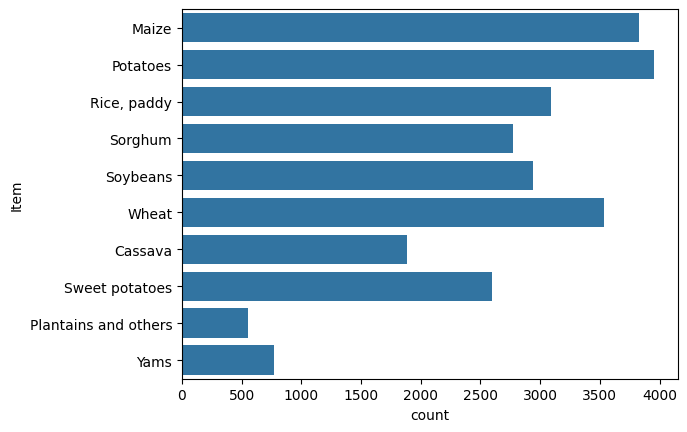

In [ ]:
sns.countplot(y=df["Item"])

In [ ]:
crops=(df["Item"].unique())

In [ ]:
yield_per_item=[]
for crop in crops:
  yield_per_item.append(df[df["Item"]==crop]["hg/ha_yield"].sum())

In [ ]:
yield_per_item

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

<Axes: >

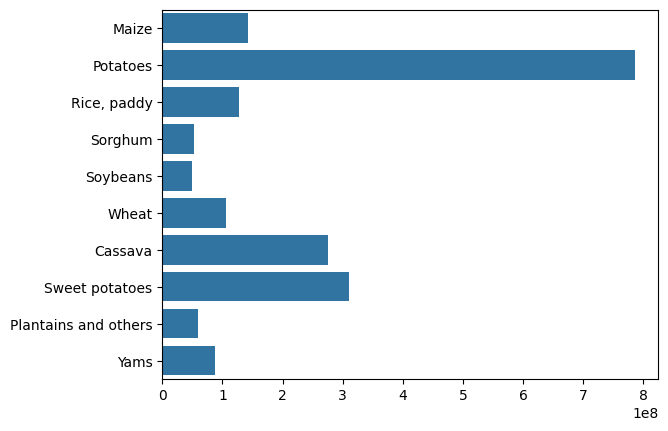

In [ ]:
sns.barplot(y=crops,x=yield_per_item)

In [ ]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [ ]:
x=df.drop("hg/ha_yield",axis=1)
y=df["hg/ha_yield"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485,121.00,16.37,Albania,Maize,36613
1,1990,1485,121.00,16.37,Albania,Potatoes,66667
2,1990,1485,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485,121.00,16.37,Albania,Sorghum,12500
4,1990,1485,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [ ]:
one=OneHotEncoder(drop="first")
scaler=StandardScaler()

In [ ]:
preprocesser=ColumnTransformer(
    transformers=[
        ("one",one,[4,5]),
        ('standrization',scaler,[0,1,2,3])
    ],
    remainder="passthrough"
    )



In [ ]:
preprocesser


ColumnTransformer(remainder='passthrough',
                  transformers=[('one', OneHotEncoder(drop='first'), [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [ ]:
print(df.columns.tolist())


['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
x_train_dummy=preprocesser.fit_transform(x_train)
x_test_dummy=preprocesser.transform(x_test)

In [ ]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240,98328.63,27.51,Colombia,Maize
28212,2010,657,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537,36572.75,7.85,Canada,Wheat
860,1991,534,17866.00,18.73,Australia,Potatoes
17223,1998,250,6416.14,6.94,Kazakhstan,Potatoes


In [ ]:
x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor()
}
for name,model in models.items():
  model.fit(x_train_dummy,y_train)
  y_pred=model.predict(x_test_dummy)
  # print(f"{name} : {r2_score(y_test,y_pred)}")
  print(f"{name} MSE : {mean_squared_error(y_test,y_pred)} score {r2_score(y_test,y_pred)}")


LinearRegression MSE : 1821709192.8756154 score 0.7486566530283931


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso MSE : 1822234158.2996287 score 0.7485842229351424
Ridge MSE : 1822556724.5245535 score 0.7485397180960003
KNeighborsRegressor MSE : 128210171.76440331 score 0.9823106927202787
DecisionTreeRegressor MSE : 169887558.16676307 score 0.9765604149962791


In [ ]:
DecisionTreeRegressor=DecisionTreeRegressor()
DecisionTreeRegressor.fit(x_train_dummy,y_train)
y_pred=DecisionTreeRegressor.predict(x_test_dummy)

In [ ]:
x_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
24234,2000,59,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240,98328.63,27.51,Colombia,Maize
28212,2010,657,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537,36572.75,7.85,Canada,Wheat
860,1991,534,17866.00,18.73,Australia,Potatoes
17223,1998,250,6416.14,6.94,Kazakhstan,Potatoes


In [ ]:
def prediciton(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
  feature = pd.DataFrame([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]],
                         columns=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item'])
  feature_dummy = preprocesser.transform(feature)
  prediction = DecisionTreeRegressor.predict(feature_dummy).reshape(-1, 1)
  return prediction



In [ ]:
Year=	2000
average_rain_fall_mm_per_year=59.0
pesticides_tonnes=3024.11
avg_temp=26.55
Area='Saudi Arabia'
Item='Sorghum'


In [ ]:
result=prediciton(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)
result

array([[13384.]])

In [ ]:
import pickle
pickle.dump(DecisionTreeRegressor,open("model.pkl","wb"))
pickle.dump(preprocesser,open("preprocesser.pkl","wb"))


In [ ]:
import joblib

joblib.dump(KNeighborsRegressor, "model.pkl")
joblib.dump(preprocesser, "preprocesser.pkl")
joblib.dump(model, "DecisionTreeModel.pkl")


['DecisionTreeModel.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")
files.download("preprocesser.pkl")
files.download("DecisionTreeModel.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>